In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.30']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
979,Afghanistan,22.10.30,202966
1970,Africa,22.10.30,12383564
2949,Albania,22.10.30,332966
3928,Algeria,22.10.30,270836
4901,Andorra,22.10.30,46535
...,...,...,...
227541,Wallis and Futuna,22.10.30,761
228555,World,22.10.30,630151861
229489,Yemen,22.10.30,11939
230446,Zambia,22.10.30,333681


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
979,Afghanistan,22.10.30,202966
2949,Albania,22.10.30,332966
3928,Algeria,22.10.30,270836
4901,Andorra,22.10.30,46535
5856,Angola,22.10.30,103131
...,...,...,...
225852,Vietnam,22.10.30,11502474
227541,Wallis and Futuna,22.10.30,761
229489,Yemen,22.10.30,11939
230446,Zambia,22.10.30,333681


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
218437,United States,22.10.30,97450639
95292,India,22.10.30,44653592
73480,France,22.10.30,36832762
78347,Germany,22.10.30,35571131
29212,Brazil,22.10.30,34815258
193834,South Korea,22.10.30,25557309
217424,United Kingdom,22.10.30,23898489
103145,Italy,22.10.30,23531023
105122,Japan,22.10.30,22302251
171658,Russia,22.10.30,21118937


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
211434,Turkey,22.10.30,16919638
195776,Spain,22.10.30,13511768
157248,Oceania,22.10.30,12618355
225852,Vietnam,22.10.30,11502474
12784,Australia,22.10.30,10377788
...,...,...,...
227541,Wallis and Futuna,22.10.30,761
97262,International,22.10.30,721
223879,Vatican,22.10.30,29
213487,Tuvalu,22.10.30,23


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.30', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_17340\685331668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.30', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.30,97450639
India,22.10.30,44653592
France,22.10.30,36832762
Germany,22.10.30,35571131
Brazil,22.10.30,34815258
South Korea,22.10.30,25557309
United Kingdom,22.10.30,23898489
Italy,22.10.30,23531023
Japan,22.10.30,22302251


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.30,97450639
1,India,22.10.30,44653592
2,France,22.10.30,36832762
3,Germany,22.10.30,35571131
4,Brazil,22.10.30,34815258
5,South Korea,22.10.30,25557309
6,United Kingdom,22.10.30,23898489
7,Italy,22.10.30,23531023
8,Japan,22.10.30,22302251
9,Russia,22.10.30,21118937


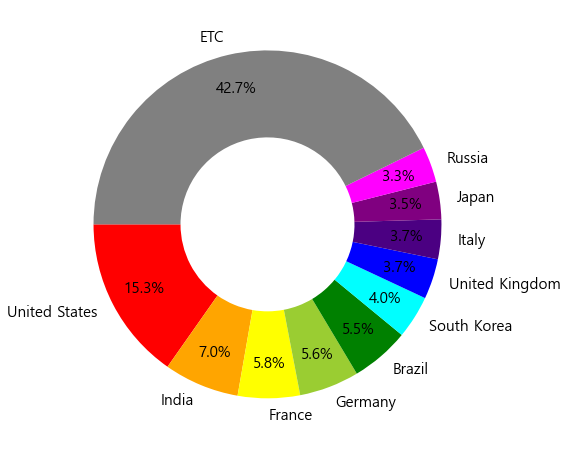

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()